## Seção 02 - API Básica e RNA
# Aluno: Bruno Moreira Ribas 
# Câncer de Mama - Rede Neurais Básico

In [1]:

import tensorflow as tf
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:

data.data.shape
data.target
data.target_names
data.feature_names
data.target.shape

(569,)

In [3]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [4]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:

model = tf.keras.models.Sequential( [ tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid') ] )
#or
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,),
#activation='sigmoid'))
#or
#i = tf.keras.layers.Input(shape=(D,))
#x = tf.keras.layers.Dense(1, activation="sigmoid")(i)
#model = tf.keras.models.Model(i, x)


In [8]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100)


Epoch 1/100
12/12 [==============================] - 2s 44ms/step - loss: 0.5881 - accuracy: 0.6850 - val_loss: 0.5972 - val_accuracy: 0.7181
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5308 - accuracy: 0.7795 - val_loss: 0.5439 - val_accuracy: 0.7660
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.4833 - accuracy: 0.8268 - val_loss: 0.4983 - val_accuracy: 0.8085
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4426 - accuracy: 0.8530 - val_loss: 0.4599 - val_accuracy: 0.8404
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4088 - accuracy: 0.8793 - val_loss: 0.4277 - val_accuracy: 0.8723
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.3803 - accuracy: 0.8950 - val_loss: 0.4000 - val_accuracy: 0.8777
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.3558 - accuracy: 0.9108 - val_loss: 0.3765 - val_accuracy: 0.8830
Epoch 8

In [9]:

print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 10ms/step - loss: 0.0855 - accuracy: 0.9738
Train score:  [0.08547956496477127, 0.9737532734870911]
6/6 [==============================] - 0s 8ms/step - loss: 0.1189 - accuracy: 0.9628
Test score:  [0.11886519938707352, 0.9627659320831299]


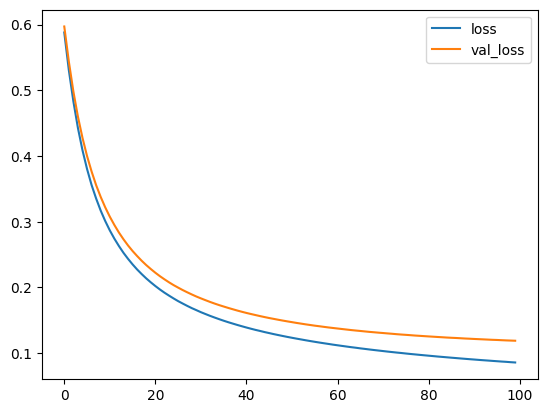

In [10]:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

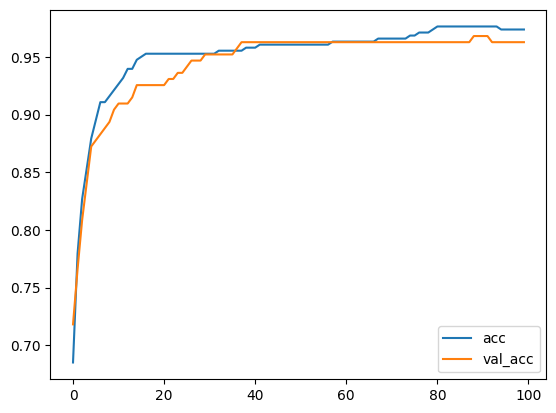

In [11]:

plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:

pred = model.predict(X_test)
print(pred)

6/6 [==============================] - 0s 3ms/step
[[9.74516690e-01]
 [9.99514282e-01]
 [4.73915264e-07]
 [9.97156501e-01]
 [9.93557334e-01]
 [4.66013327e-04]
 [1.59126765e-04]
 [9.96993423e-01]
 [9.99452353e-01]
 [6.83434665e-01]
 [9.52457666e-01]
 [9.90782380e-01]
 [9.99750555e-01]
 [9.98428285e-01]
 [9.98830914e-01]
 [4.03450243e-02]
 [3.21143568e-01]
 [9.96244788e-01]
 [8.78445357e-02]
 [9.22246337e-01]
 [3.28965107e-04]
 [1.09042712e-02]
 [9.84052062e-01]
 [9.94187772e-01]
 [9.37035620e-01]
 [9.57357261e-05]
 [9.82516766e-01]
 [9.98957634e-01]
 [3.04170419e-02]
 [8.74497652e-01]
 [9.98791099e-01]
 [7.15597034e-01]
 [9.21915710e-01]
 [9.53233242e-01]
 [9.52907562e-01]
 [9.91196334e-01]
 [5.97834005e-04]
 [9.87664461e-01]
 [9.88723814e-01]
 [4.24203835e-02]
 [5.49719087e-04]
 [9.88540292e-01]
 [2.24154919e-01]
 [9.97792423e-01]
 [7.24080577e-02]
 [9.94927764e-01]
 [1.68385857e-04]
 [1.11147102e-07]
 [9.94012952e-01]
 [7.69916058e-01]
 [9.77198422e-01]
 [1.28661413e-05]
 [9.87511575e

In [13]:

import numpy as np
# flatten: transformar em vetor, pois está em matriz (N,1)
pred = np.round(pred).flatten()
print(pred)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])

Acurácia na mão:  0.9627659574468085
6/6 [==============================] - 0s 7ms/step - loss: 0.1189 - accuracy: 0.9628
Evaluate:  [0.11886519938707352, 0.9627659320831299]

6/6 [==============================] - 0s 6ms/step - loss: 0.1189 - accuracy: 0.9628
Acurácia:  0.9627659320831299


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

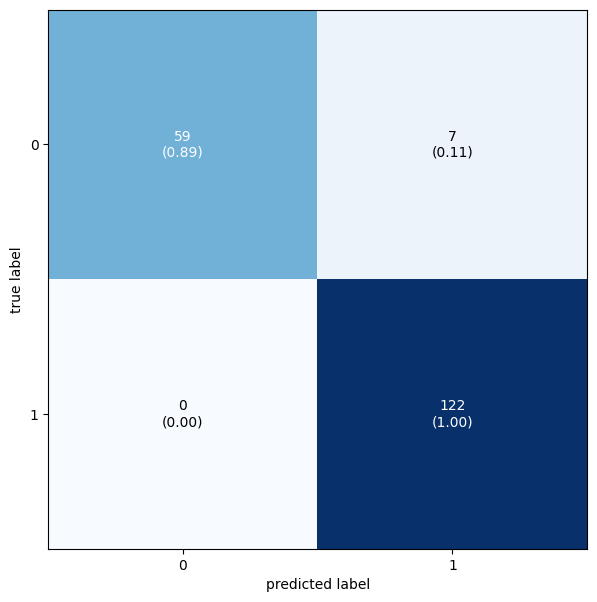

In [16]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

# MNIST - Reconhecimento de dígitos

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)
     

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


In [18]:
x_train, x_test = x_train/255.0, x_test/255.0

i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(i, x)


model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
r = model.fit(x_train,
y_train,
validation_data=(x_test, y_test),
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2926 - accuracy: 0.9147 - val_loss: 0.1393 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1409 - accuracy: 0.9579 - val_loss: 0.0979 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1058 - accuracy: 0.9673 - val_loss: 0.0829 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0762 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0729 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0659 - accuracy: 0.9789 - val_loss: 0.0699 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0687 - val_accura

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9793
[0.07579611241817474, 0.9793000221252441]


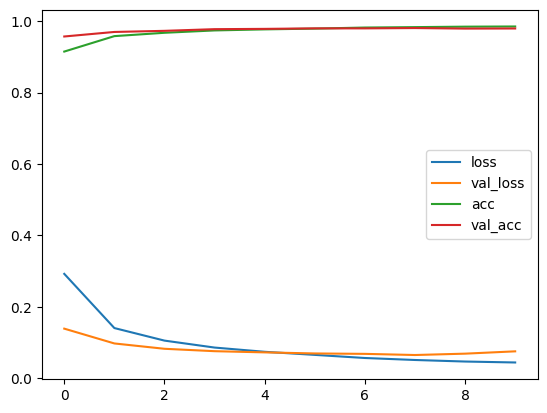

In [19]:
# função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 2s 4ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

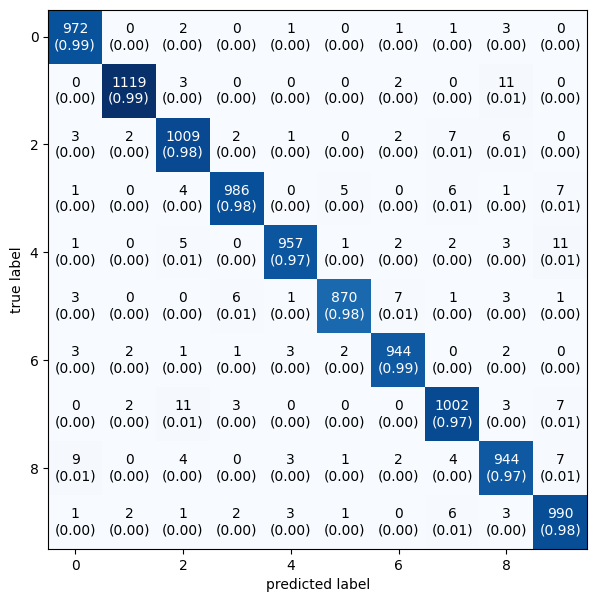

In [20]:

# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

Text(0.5, 1.0, 'True label: 2 Predicted: 7')

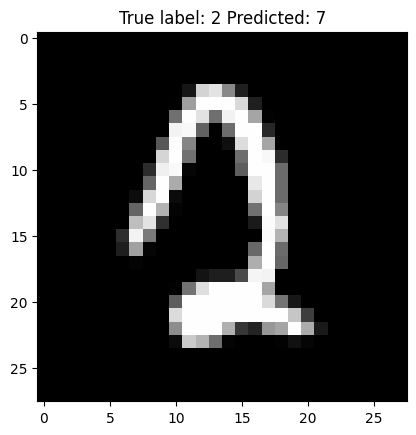

In [21]:

# mostrar algumas classificações erradas
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

# Biomassa: Predição de Biomassa

In [22]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
tf.__version__

'2.12.0'

In [23]:

!wget http://www.razer.net.br/datasets/Biomassa_REG.csv
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=
",").values
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

--2023-05-04 23:07:05--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv’

Biomassa_REG.csv    100%[===================>]  81.04K  --.-KB/s    in 0.1s    

2023-05-04 23:07:05 (686 KB/s) - ‘Biomassa_REG.csv’ saved [82988/82988]



In [25]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
dap_train = x_train[:,0]
h_train = x_train[:,1]
dap_test = x_test[:,0]
h_test = x_test[:,1]

i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

In [26]:

def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )
def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

In [27]:

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,
loss="mse",
metrics=[rmse, r2])

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
r = model.fit(x_train, y_train,
epochs=1500,
validation_data=(x_test, y_test),
callbacks=[early_stop])

Epoch 1/1500
84/84 [==============================] - 2s 8ms/step - loss: 9056757.0000 - rmse: 1372.8191 - r2: -0.0576 - val_loss: 9853425.0000 - val_rmse: 1498.4384 - val_r2: 0.0959
Epoch 2/1500
84/84 [==============================] - 0s 3ms/step - loss: 7042575.5000 - rmse: 1306.7814 - r2: 0.0072 - val_loss: 8682147.0000 - val_rmse: 1093.1465 - val_r2: 0.3880
Epoch 3/1500
84/84 [==============================] - 0s 3ms/step - loss: 5879112.5000 - rmse: 1022.5764 - r2: -0.1099 - val_loss: 7510539.0000 - val_rmse: 1214.1796 - val_r2: 0.0082
Epoch 4/1500
84/84 [==============================] - 0s 3ms/step - loss: 5312503.5000 - rmse: 975.8039 - r2: 0.2845 - val_loss: 7240520.5000 - val_rmse: 1002.1194 - val_r2: 0.3801
Epoch 5/1500
84/84 [==============================] - 0s 3ms/step - loss: 5224623.5000 - rmse: 1059.1401 - r2: -0.7647 - val_loss: 6862906.0000 - val_rmse: 1047.2275 - val_r2: 0.1910
Epoch 6/1500
84/84 [==============================] - 0s 3ms/step - loss: 5073314.0000 -

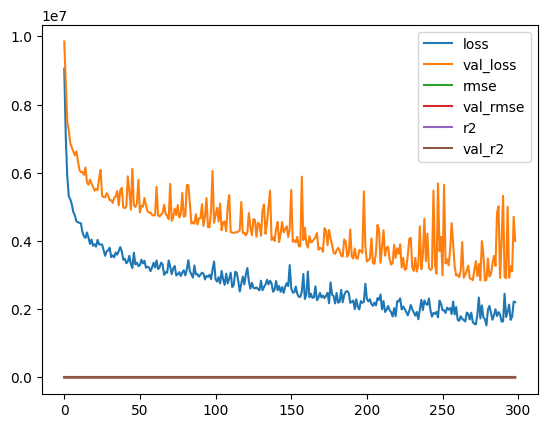

In [30]:

plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()
plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()
     

In [31]:

y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

42/42 [==============================] - 0s 3ms/step
mse =  2844623.5691008293
rmse =  1686.6011885151834
r2 =  0.8396015393568244


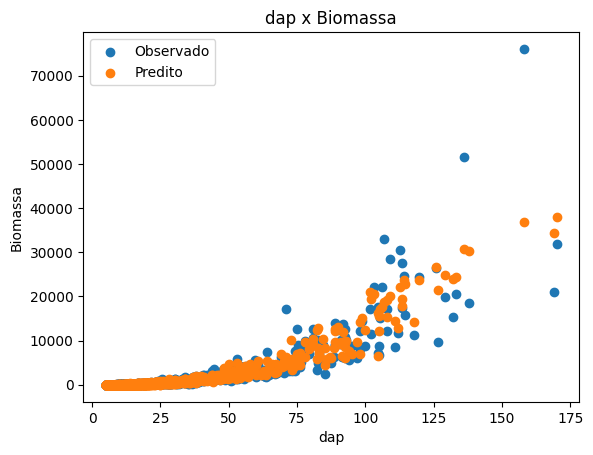

In [32]:

plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()